In [1]:
#Let's read the dataset
import pandas as pd
df = pd.read_csv("../BostonHousing.csv")

Today is the 10 Day of our Machile Learning challenge where we will write a code in order to learn Machine Learning every single day.
Today our topic will be Feature Selection. We will learn how to work with the features and leave only the needed one.
We will implement the code also of Feature Selection.

In [23]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


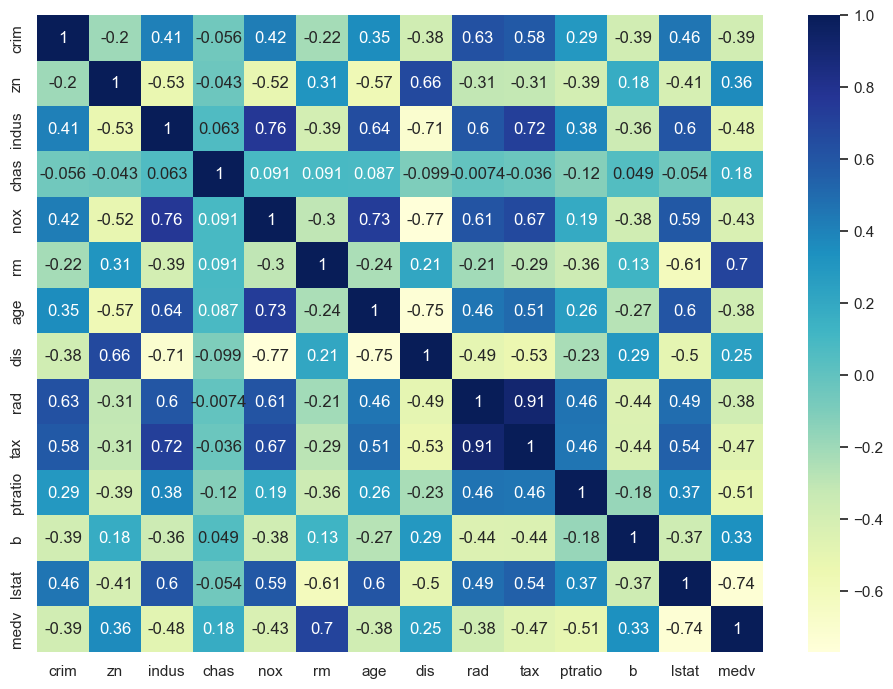

In [26]:
#Our first method will be seeing the correlation between features
#We will se the heatmap of features 
import seaborn as sb
sb.set_theme(rc={'figure.figsize':(11.7,8.27)})
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)


In [35]:
#Now from the correlations we can see that features like "RM" positively and features like "LSTAT" negatively are the most correlated features for the target value
#This is one of the ways you can do feature selection by seeing the correlations for example in my opinion we can drop the column "CHAS" may be as it is correlation 
#for the target value is really small and it could harm the model rather than help it
df.corr()["medv"].sort_values()

lstat     -0.737663
ptratio   -0.507787
indus     -0.483725
tax       -0.468536
nox       -0.427321
crim      -0.388305
rad       -0.381626
age       -0.376955
chas       0.175260
dis        0.249929
b          0.333461
zn         0.360445
rm         0.695360
medv       1.000000
Name: medv, dtype: float64

In [49]:
#Our second method will be using the Variance Threshold
#in sklearn there is already method which implements Variance Threshold it self
from sklearn.feature_selection import VarianceThreshold
#now we will give the threshold\#we should remember that what threshold we put the code will search for the features where variance is 0.4 in here case for example 
threshold = VarianceThreshold(threshold=0.4)
threshold.fit(df)

VarianceThreshold(threshold=0.4)

In [50]:
threshold.get_support()

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [51]:
#Let's see the column which are not so important for prediction
df.columns[threshold.get_support()], df.columns
#now here you can see the difference that "CHAS", "NOX" does have variance 0.4 and they are not so important

(Index(['crim', 'zn', 'indus', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b',
        'lstat', 'medv'],
       dtype='object'),
 Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
        'ptratio', 'b', 'lstat', 'medv'],
       dtype='object'))

Today in the 10 Day of our Machine Learning challenge we learned what is Feature Selection. We have seen how we can do it using correlation heatmap. 
Also we have seen how to implement it using Sklearn library and get the columns which are not so required for our training model